---
title: "Tarea 6"
author: "Danny Iñaguazo"
lang: es
format: 
  pdf:
    toc: true
    toc-title: "Tabla de Contenidos"  
execute:
  echo: true
  error: false
  warning: false
jupyter: python3
---


# Conjunto de ejercicios

Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

1.-
$$\frac{1}{25x^2 + 1} , x_0 = 0$$
2.-
$$\arctan{x} , x_0 = 1$$



## 1.- Series de Taylor

Utilizaremos las siguientes librerías con el objetivo de cumplir los requisitos solicitados:


In [110]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import sympy as sym


Algunas librerías tienen que ver estrechamente con la representación de las funciones en una interfaz gráfica de "matplotlib". Sympy nos ayudará en cuanto a cálculos y álgebra matemática. 


In [112]:
def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor


En nuestro ejercicio, utilizaremos las series de Taylor hasta $n = 5$, podemos ahora mismo mostrar el resultado de la función "taylor_approx" utilizando como parámetros la función original, $x_0$ y el orden del polinomio.

### Función 1


In [114]:
func = lambda x : 1 / (25*x*x + 1)
taylor_pol = taylor_approx(func, 0, 5)
taylor_pol

625*x**4 - 25*x**2 + 1


Para graficar la función resultante, usaremos otra función con las librerías previamente mencionadas.


In [116]:
def plot_taylor_approx(fcn: Callable[[float], float], taylor_poly, n: int, x_range: tuple):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label=f"Función original", color='black')
    
    taylor_fcn = sym.lambdify(x, taylor_poly, "numpy")
        
    taylor_y_vals = taylor_fcn(x_vals)
    if np.isscalar(taylor_y_vals):
        taylor_y_vals = np.full_like(x_vals, taylor_y_vals)
        
    plt.plot(x_vals, taylor_y_vals, label=f"Polinomio de Taylor de orden n={n}")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximaciones de Taylor")
    plt.legend()
    plt.grid(True)
    plt.show()


Solo faltaría llamarla con los datos que tenemos disponibles:


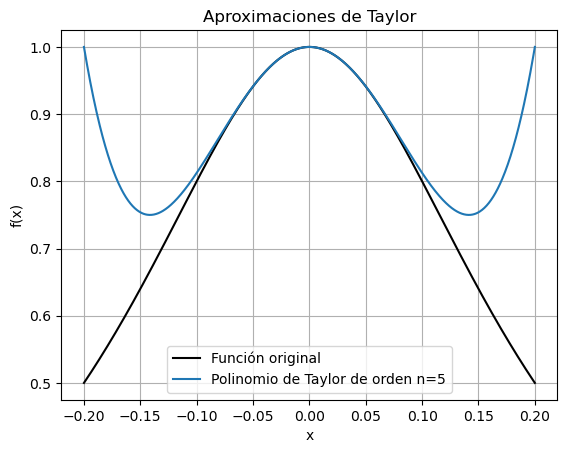

In [118]:
plot_taylor_approx(func, taylor_pol, 5, (-0.2, 0.2))


### Función 2

Construimos la función 2 con lambda:


In [120]:
func2 = lambda x : sym.atan(x)
taylor_pol = taylor_approx(func2, 1, 5)
taylor_pol

x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4


En este apartado previo se muestra el polinomio de Taylor de orden $n = 5$, ahora procedemos a graficarlo:


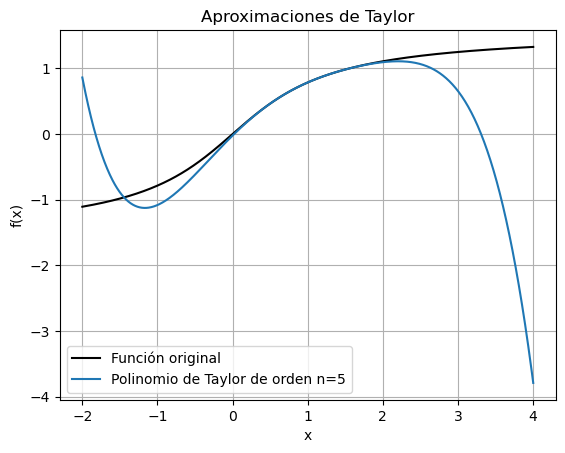

In [122]:
plot_taylor_approx(func2, taylor_pol, 5, (-2, 4))


## 2.- Polinomio de Lagrange

Para usar este método, implementamos otra librería que facilita el cálculo del polinomio. 


In [124]:
from scipy.interpolate import lagrange


En este caso, se necesita de más de un punto si queremos que funcione, entonces he recopilado 3 puntos incluyendo el ya asignado como dato.

### Función 1

El siguiente código calcula el polinomio de lagrange para la primera función (Dos puntos extra agregados para que se asemeje a la función original):


In [126]:
X = [-0.4, 0, 0.4]
Y = [0.2, 1, 0.2]

polynomial = lagrange(X, Y)
print(polynomial)

    2
-5 x + 1



El siguiente paso es graficar la función original y la función resultante del polinomio de lagangre. Para esto se usa la función a continuación.


In [128]:
def plot_lagrange(fcn : Callable[[float], float], pol, n: int, x_range: tuple, X, Y):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label=f"Función original", color='black')
    
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = polynomial(x_values)

    plt.scatter(X, Y, color='red', label='Datos Originales')
    plt.plot(x_values, y_values, label=f'Polinomio Interpolado de orden n = {n}')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.legend()
    plt.grid(True)
    plt.show()
    


Utilizamos la función que ya definimos anteriormente (Función 1) y llamamos la función graficadora.


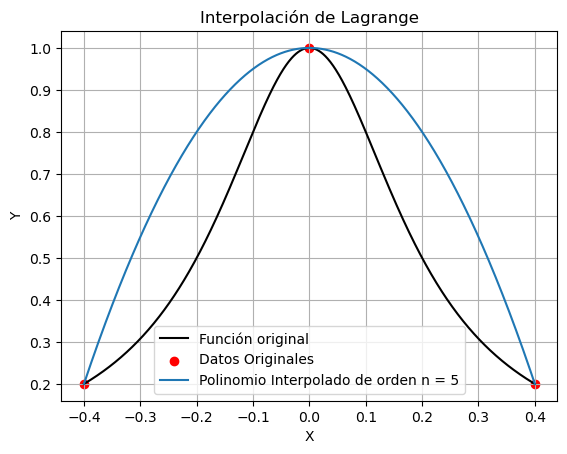

In [130]:
plot_lagrange(func, polynomial, 5, (-0.4, 0.4), X, Y)


### Función 2

Representamos algunos valores o pares ordenados de la propia función original para usar el polinomio de lagrange.


In [132]:
X = [0, 1, 2]
Y = [0, 0.785, 1.107]

polynomial = lagrange(X, Y)
print(polynomial)

         2
-0.2315 x + 1.017 x



Ahora llamamos a la función graficadora:


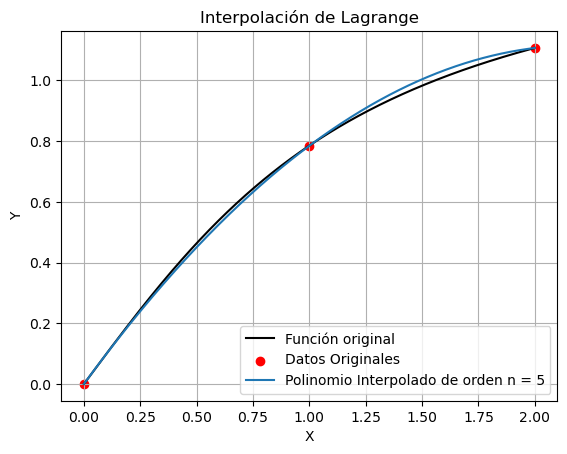

In [134]:
plot_lagrange(func2, polynomial, 5, (0, 2), X, Y)